# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhamad Alif Ramadhan
- **Email:** muhamadalifram@gmail.com
- **ID Dicoding:** malifram

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren pertumbuhan jumlah user per bulan dari tahun 2011 hingga 2012?
- Pertanyaan 2: Hari apa yang memiliki jumlah penyewaan sepeda terbanyak?
- Pertanyaan 3: Berapa persentase user yang menggunakan layanan berdasarkan kondisi cuaca?
- Pertanyaan 4: Pada pukul berapa terjadi peningkatan penyewaan sepeda yang signifikan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Membaca File CSV Data Hari dan Jam

In [ ]:
day_df = pd.read_csv('/content/day.csv')
hour_df = pd.read_csv('/content/hour.csv')

Menampilkan Data Hari dari day.csv

In [ ]:
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Menampilkan Data Jam dari hour.csv

In [ ]:
hour_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


=========================================
**Dataset characteristics**
=========================================
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


**Insight:**
- Data Hari dan Jam berhasil diunggah dan dibaca.
- Mengetahui keterangan data pada nama-nama kolom.

### Assessing Data

Memeriksa tipe Data Day dan Hour

In [ ]:
print("----- Info Data Day -----")
day_df.info()
print("----- Info Data Hour -----")
hour_df.info()

----- Info Data Day -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
----- Info Data Hour -----
<class 'pandas.core.frame.DataFrame'>
Ra

Memeriksa Missing Value pada Data Day

In [ ]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Memeriksa Missing Value pada Data Hour

In [ ]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Memeriksa Duplikasi Data Day dan Hour

In [ ]:
print("Jumlah duplikat: ", day_df.duplicated().sum())
print("Jumlah duplikat: ", hour_df.duplicated().sum())

Jumlah duplikat:  0
Jumlah duplikat:  0


Memeriksa Parameter Statistik pada Data Day

In [ ]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Memeriksa Parameter Statistik pada Data Hour

In [ ]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- Terdapat kesalahan tipe data pada kolom dteday (sebelumnya object menjadi datetime)
- Menghapus kolom yang tidak diperlukan
- Merubah nama kolom agar lebih mudah dipahami
- Memperbaiki nilai dari beberapa isi kolom
- Menambah kolom untuk memperjelas data
- Tidak adanya duplikat data dan missing value

### Cleaning Data

Mengubah Tipe Data

In [ ]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

Menghapus Kolom

In [ ]:
day_df.drop(columns=['workingday'], inplace=True)
hour_df.drop(columns=['workingday'], inplace=True)

Menghapus Kolom

In [ ]:
day_df.drop(columns=['yr'], inplace=True)
hour_df.drop(columns=['yr'], inplace=True)

Mengubah Nama Kolom

In [ ]:
day_df.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'weekday': 'a_week',
    'weathersit':'weather_situation',
    'windspeed':'wind_speed',
    'hum': 'humidity',
    'cnt': 'count_cr'
}, inplace=True)

Mengubah Nama Kolom

In [ ]:
hour_df.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather_situation',
    'windspeed': 'wind_speed',
    'weekday': 'a_week',
    'hum': 'humidity',
    'cnt': 'count_cr'
}, inplace=True)

Memperbaiki Nilai

In [ ]:
month_name = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
day_df['month'] = day_df['month'].map(month_name)
hour_df['month'] = hour_df['month'].map(month_name)

Memperbaiki Nilai

In [ ]:
season_name = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
day_df['season'] = day_df['season'].map(season_name)
hour_df['season'] = hour_df['season'].map(season_name)

Memperbaiki Nilai

In [ ]:
day_name = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}
day_df['a_week'] = day_df['a_week'].map(day_name)
hour_df['a_week'] = hour_df['a_week'].map(day_name)

Memperbaiki Nilai

In [ ]:
weather_name = {
    1: 'Clear',
    2: 'Misty',
    3: 'Light Rainsnow',
    4: 'Heavy Rainsnow'
}
day_df['weather_situation'] = day_df['weather_situation'].map(weather_name)
hour_df['weather_situation'] = hour_df['weather_situation'].map(weather_name)

Membulatkan Nilai

In [ ]:
day_df['humidity'] = day_df['humidity']*100
day_df['temp'] = day_df['temp']*41
day_df['atemp'] = day_df['atemp']*50
day_df['wind_speed'] = day_df['wind_speed']*67

hour_df['humidity'] = hour_df['humidity']*100
hour_df['temp'] = hour_df['temp']*41
hour_df['atemp'] = hour_df['atemp']*50
hour_df['wind_speed'] = hour_df['wind_speed']*67

Menambah Kolom

In [ ]:
weekends = {'Saturday', 'Sunday'}

def categorize_day(day):
    if day in weekends:
        return 'Weekend'
    else:
        return 'Weekday'

day_df['day_category'] = day_df['a_week'].apply(categorize_day)
hour_df['day_category'] = hour_df['a_week'].apply(categorize_day)

Menambah Kolom

In [ ]:
def categorize_humidity(humidity):
    if humidity <= 35:
        return 'Low'
    elif humidity <= 70:
        return 'Medium'
    else:
        return 'High'

day_df['humidity_category'] = day_df['humidity'].apply(categorize_humidity)
hour_df['humidity_category'] = hour_df['humidity'].apply(categorize_humidity)

Menampilkan Data Day teratas

In [ ]:
day_df.head()

,instant,dteday,season,month,holiday,a_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,day_category,humidity_category
0,1,2011-01-01,Spring,January,0,Saturday,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985,Weekend,High
1,2,2011-01-02,Spring,January,0,Sunday,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801,Weekend,Medium
2,3,2011-01-03,Spring,January,0,Monday,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,Weekday,Medium
3,4,2011-01-04,Spring,January,0,Tuesday,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,Weekday,Medium
4,5,2011-01-05,Spring,January,0,Wednesday,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,Weekday,Medium


Menampilkan Data Hour teratas

In [ ]:
hour_df.head()

,instant,dteday,season,month,hour,holiday,a_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,day_category,humidity_category
0,1,2011-01-01,Spring,January,0,0,Saturday,Clear,9.84,14.395,81.0,0.0,3,13,16,Weekend,High
1,2,2011-01-01,Spring,January,1,0,Saturday,Clear,9.02,13.635,80.0,0.0,8,32,40,Weekend,High
2,3,2011-01-01,Spring,January,2,0,Saturday,Clear,9.02,13.635,80.0,0.0,5,27,32,Weekend,High
3,4,2011-01-01,Spring,January,3,0,Saturday,Clear,9.84,14.395,75.0,0.0,3,10,13,Weekend,High
4,5,2011-01-01,Spring,January,4,0,Saturday,Clear,9.84,14.395,75.0,0.0,0,1,1,Weekend,High


**Insight:**
- Mengubah tipe data pada kolom dteday dari object menjadi datetime.
- Menghapus beberapa kolom yang tidak digunakan pada Data Day dan Hour.
- Mengubah beberapa nama kolom pada Data Day dan Hour.
- Memperbaiki nilai pada beberapa kolom agar mudah dibaca/mengerti.
- Membuat isi nilai kolom menjadi bilangan bulat.
- Menambahkan beberapa kolom dengan fungsi dari data yang sesuai.

## Exploratory Data Analysis (EDA)

### Explore Data Day

Memeriksa Parameter Statistik pada Data Day

In [ ]:
day_df.describe(include='all')

,instant,dteday,season,month,holiday,a_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,day_category,humidity_category
count,731.000000,731,731,731,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,4,12,NaN,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,January,NaN,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday,Medium
freq,NaN,NaN,188,62,NaN,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,487
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,0.028728,NaN,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,0.000000,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,0.000000,NaN,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,0.000000,NaN,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,0.000000,NaN,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,1.000000,NaN,NaN,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000,NaN,NaN


Mengelompokkan Data

In [ ]:
day_df.groupby(by='month').agg({
    'count_cr': 'sum'
}).sort_values(by='count_cr', ascending=False)

,count_cr
month,
August,351194
June,346342
September,345991
July,344948
May,331686
October,322352
April,269094
November,254831
March,228920


Mengelompokkan Data

In [ ]:
day_df.groupby(by='season').agg({
    'count_cr': 'sum'
}).sort_values(by='count_cr', ascending=False)

,count_cr
season,
Fall,1061129
Summer,918589
Winter,841613
Spring,471348


### Explore Data Hour

Memeriksa Parameter Statistik pada Data Hour

In [ ]:
hour_df.describe(include='all')

,instant,dteday,season,month,hour,holiday,a_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,day_category,humidity_category
count,17379.0000,17379,17379,17379,17379.000000,17379.000000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,12,NaN,NaN,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,May,NaN,NaN,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday,Medium
freq,NaN,NaN,4496,1488,NaN,NaN,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,9471
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,11.546752,0.028770,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,0.000000,0.000000,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,6.000000,0.000000,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,12.000000,0.000000,NaN,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,18.000000,0.000000,NaN,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,23.000000,1.000000,NaN,NaN,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000,NaN,NaN


Mengelompokkan Data

In [ ]:
hour_df.groupby(by='a_week').agg({
    'count_cr': 'sum'
}).sort_values(by='count_cr', ascending=False)

,count_cr
a_week,
Friday,487790
Thursday,485395
Saturday,477807
Wednesday,473048
Tuesday,469109
Monday,455503
Sunday,444027


Mengelompokkan Data

In [ ]:
hour_df.groupby(by='hour').agg({
    'count_cr': 'sum'
})

,count_cr
hour,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


**Insight:**
- Pada Data Day dan Hour memiliki Statistik Parameter Normal.
- Total penyewa Sepeda berdasarkan nama bulan Tertinggi terdapat pada bulan Agustus dan Terendah adalah bulan Januari.
- Total penyewa Sepeda berdasarkan musim tertinggi terdapat pada musim Summer/Panas dan Terendah adalah musim Spring/Semi.
- Total penyewa Sepeda berdasarkan nama hari Tertinggi terdapat pada hari Jumat dan Terendah adalah hari Minggu.
- Total penyewa Sepeda berdasarkan jam tertinggi terdapat pada pukul 17.00

## Visualization & Explanatory Analysis

- Pertanyaan 1: Bagaimana tren pertumbuhan jumlah user per bulan dari tahun 2011 hingga 2012?
- Pertanyaan 2: Hari apa yang memiliki jumlah penyewaan sepeda terbanyak?
- Pertanyaan 3: Berapa persentase user yang menggunakan layanan berdasarkan kondisi cuaca?
- Pertanyaan 4: Pada pukul berapa terjadi peningkatan penyewaan sepeda yang signifikan?

### Pertanyaan 1: Bagaimana tren pertumbuhan jumlah user per bulan dari tahun 2011 hingga 2012?

<ipython-input-33-dee4c9a0a1e9>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_user_df = day_df.resample(rule='M', on='dteday').agg({


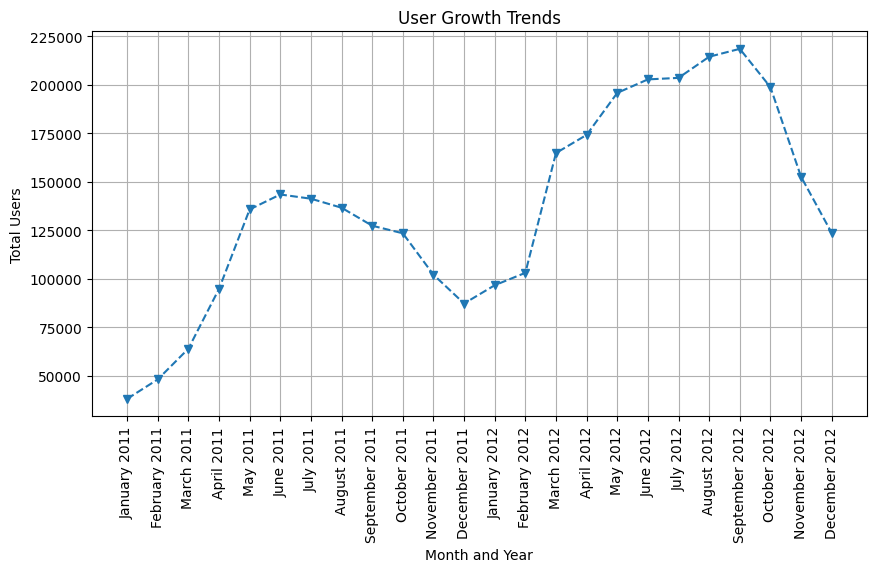

In [ ]:
monthly_user_df = day_df.resample(rule='M', on='dteday').agg({
    'dteday': 'first',
    'count_cr': 'sum'
})

monthly_user_df['month'] = monthly_user_df['dteday'].dt.strftime('%B %Y')

plt.figure(figsize=(10, 5))
plt.plot(monthly_user_df['month'], monthly_user_df['count_cr'], marker='v', linestyle='--')
plt.title('User Growth Trends')
plt.xlabel('Month and Year')
plt.ylabel('Total Users')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Gambar di atas menunjukkan tren peningkatan penyewaan sepeda dimulai pada Juni 2011, dengan puncaknya pada September 2012.

### Pertanyaan 2: Hari apa yang memiliki jumlah penyewaan sepeda terbanyak?

<ipython-input-34-9f7d0506e634>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='a_week', y='count_cr', data=daily_users_df,


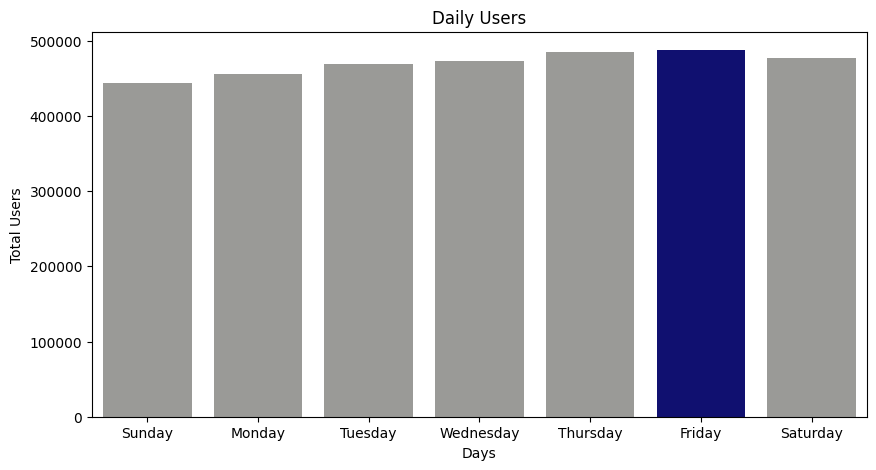

In [ ]:
daily_users_df = day_df.groupby(by="a_week").count_cr.sum().reset_index()
daily_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

plt.figure(figsize=(10, 5))
sns.barplot(x='a_week', y='count_cr', data=daily_users_df,
            palette=["#9B9A96", "#9B9A96", "#9B9A96", "#9B9A96", "#9B9A96","#000080", "#9B9A96"],
            order=daily_order, legend=False)

plt.title('Daily Users')
plt.xlabel('Days')
plt.ylabel('Total Users')
plt.show()

Gambar diatas menunjukkan bahwa hari dengan total penyewaan sepeda terbanyak adalah Jumat, dengan 487.790 penyewa.

### Pertanyaan 3: Berapa persentase user yang menggunakan layanan berdasarkan kondisi cuaca?

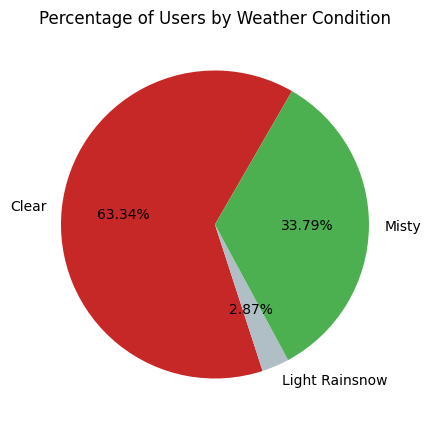

In [ ]:
weather_user_df = day_df.groupby(by="weather_situation").dteday.count().reset_index()

weather_user_df['percentage'] = (weather_user_df['dteday'] / weather_user_df['dteday'].sum()) * 100

plt.figure(figsize=(5, 5))
plt.pie(weather_user_df['percentage'], labels=weather_user_df['weather_situation'], autopct='%1.2f%%',
        colors = ['#C62828', '#B0BEC5', '#4CAF50'],
        startangle=60, textprops={'fontsize': 10})
plt.title('Percentage of Users by Weather Condition')
plt.show()

Gambar diatas menunjukkan Presentase penyewa sepeda tertinggi, yaitu 63.34% terjadi pada kondisi cuaca cerah.

### Pertanyaan 4: Pada pukul berapa terjadi peningkatan penyewaan sepeda yang signifikan?

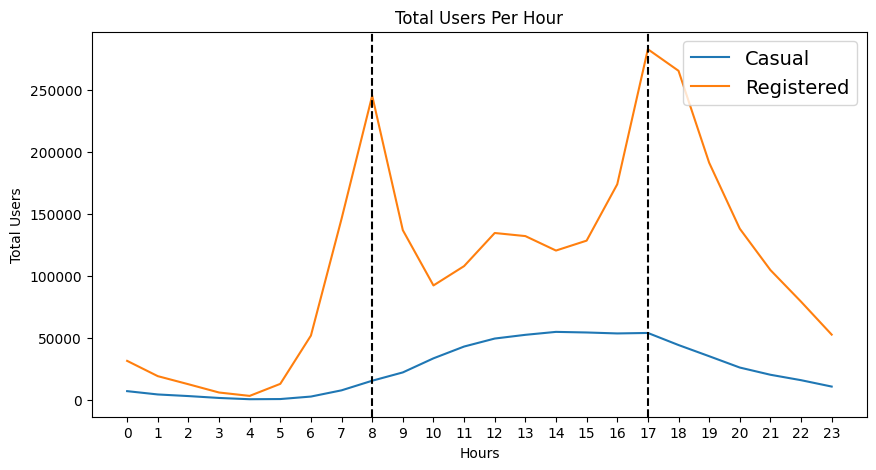

In [ ]:
hour_user_df = hour_df.groupby(by="hour").agg({
    "casual": "sum",
    "registered": "sum",
    "count_cr": "sum"
})

hour_user_df.head()

plt.figure(figsize=(10, 5))
sns.lineplot(x="hour", y="casual",
             data=hour_user_df, label="Casual")
sns.lineplot(x="hour", y="registered",
             data=hour_user_df, label="Registered")

x = np.arange(0, 24, 1)
plt.xticks(x)

plt.axvline(x=8, color='black', linestyle='--')
plt.axvline(x=17, color='black', linestyle='--')
plt.legend(loc='upper right', fontsize=14)

plt.title("Total Users Per Hour")
plt.xlabel("Hours")
plt.ylabel("Total Users")

plt.show()

Gambar diatas menunjukkan terjadi peningkatan penyewaan sepeda pada pukul 08.00 dan 17.00

**Insight:**
- Menampilkan total data tren peningkatan penyewaan sepeda selama bulan Januari 2011 hingga Desember 2022 menggunakan diagram garis (Line Chart).
- Menampilkan total data tertinggi per hari menggunakan diagram batang (Bar Chart).
- Menampilkan persentase total data penyewaan sepeda berdasarkan kondisi cuaca menggunakan diagram lingkaran (Pie Chart).
- Menampilkan total data peningkatan penyewaan sepeda berdasarkan waktu menggunakan diagram garis (Line Chart).

## Analisis Lanjutan (RFM Analysis)

Menghitung jumlah hari sejak terakhir kali pengguna melakukan pendaftaran.

In [ ]:
df_recency = day_df.groupby(by='dteday', as_index=False)['instant'].max()
df_recency.columns = ['dteday', 'max_count_cr']
recent_date = df_recency['dteday'].max()
df_recency["Recency"] = df_recency["dteday"].apply(lambda x: (recent_date - x).days)

df_recency.head()

,dteday,max_count_cr,Recency
0,2011-01-01,1,730
1,2011-01-02,2,729
2,2011-01-03,3,728
3,2011-01-04,4,727
4,2011-01-05,5,726


Menghitung jumlah total pengguna yang dihitung dari total Pendaftar dan Pengguna Casual dalam periode tertentu.

In [ ]:
day_df['Quarter'] = day_df['dteday'].dt.to_period('Q')
frequency_df = day_df.drop_duplicates().groupby(
    by='Quarter', as_index=False)['count_cr'].count()
frequency_df.columns = ['Order Date', 'Frequency']
frequency_df.head(8)

,Order Date,Frequency
0,2011Q1,90
1,2011Q2,91
2,2011Q3,92
3,2011Q4,92
4,2012Q1,91
5,2012Q2,91
6,2012Q3,92
7,2012Q4,92


**Insight:**
- Menampilkan Jumlah Hari Sejak Tanggal Pendaftaran Pertama pada 1 Januari 2011 sampai 31 Desember 2012 dengan Total 730 Hari.
- Menampilkan Jumlah Pengguna yang Dikelompokkan per Kuartal Setiap Tahunnya (2011-2012).

## Save File yang Sudah dianalisa

Menyimpan File Day Yang sudah dianalisa

In [ ]:
day_df.to_csv("dayz.csv", index=False)

Menyimpan File Hour Yang sudah dianalisa

In [ ]:
hour_df.to_csv("hourz.csv", index=False)

## Conclusion

- Conclution pertanyaan 1: Peningkatan total penyewaan menurut data pada tren bulanan adalah dibulan Juni untuk tahun 2011 dan peningkatan tertinggi pada bulan September tahun 2022.

- Conclution pertanyaan 2:
Total penyewaan tertinggi terjadi pada hari Jumat, dengan 487.790 penyewa. sementara musim dengan penyewaan terendah adalah musim semi, dengan total 444.027 penyewa.

- Conclution pertanyaan 3: Presentase total penyewaan tertinggi berdasarkan kondisi cuaca adalah pada cuaca cerah yakni 63.34%.

- Conclution pertanyaan 4: Waktu dengan peningkatan penyewa sepeda pada pukul 08.00 dan 17.00.
